In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install --upgrade plotly 

In [130]:
import warnings
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px

pd.core.common.is_list_like = pd.api.types.is_list_like


In [131]:
inicio = dt.datetime(2021, 1, 1)
fim = dt.datetime(2021, 12, 31)

In [132]:
btc = web.DataReader("BTC-USD", "yahoo", inicio, fim)
btc.reset_index(inplace=True)

eth = web.DataReader("ETH-USD", "yahoo", inicio, fim)
eth.reset_index(inplace=True)

cardano = web.DataReader("ADA-USD", "yahoo", inicio, fim)
cardano.reset_index(inplace=True)

matic = web.DataReader("MATIC-USD", "yahoo", inicio, fim)
matic.reset_index(inplace=True)

monero = web.DataReader("XMR-USD", "yahoo", inicio, fim)
monero.reset_index(inplace=True)


In [133]:
criptomoedas = btc[["Date", "Adj Close"]]
criptomoedas = criptomoedas.rename(columns = {"Adj Close" : "BTC"})
criptomoedas["BTC_7DAY_MA"] = criptomoedas.BTC.rolling(7).mean()

criptomoedas["ETH"] = eth["Adj Close"]
criptomoedas["ETH_7DAY_MA"] = criptomoedas.ETH.rolling(7).mean()

criptomoedas["ADA"] = cardano["Adj Close"]
criptomoedas["ADA_7DAY_MA"] = criptomoedas.ADA.rolling(7).mean()

criptomoedas["MATIC"] = matic["Adj Close"]
criptomoedas["MATIC_7DAY_MA"] = criptomoedas.MATIC.rolling(7).mean()

criptomoedas["MONERO"] = monero["Adj Close"]
criptomoedas["MONERO_7DAY_MA"] = criptomoedas.MATIC.rolling(7).mean()

In [134]:
criptomoedas.set_index("Date", inplace=True)

In [135]:
criptomoedas[["BTC", "ETH", "ADA", "MATIC", "MONERO"]].head()

,BTC,ETH,ADA,MATIC,MONERO
Date,,,,,
2021-01-01,29374.152344,730.367554,0.175350,0.017812,136.045868
2021-01-02,32127.267578,774.534973,0.177423,0.019043,143.117218
2021-01-03,32782.023438,975.507690,0.204995,0.019975,138.064423
2021-01-04,31971.914062,1040.233032,0.224762,0.024614,133.602768
2021-01-05,33992.429688,1100.006104,0.258314,0.024467,136.825089


In [136]:
#correlacao entre as criptomoedas
correlacao = criptomoedas[["BTC", "ETH","ADA", "MATIC", "MONERO"]].corr()

display(correlacao)

,BTC,ETH,ADA,MATIC,MONERO
BTC,1.000000,0.552612,0.390197,0.171181,0.501045
ETH,0.552612,1.000000,0.720516,0.839466,0.419593
ADA,0.390197,0.720516,1.000000,0.629937,0.532313
MATIC,0.171181,0.839466,0.629937,1.000000,0.200294
MONERO,0.501045,0.419593,0.532313,0.200294,1.000000


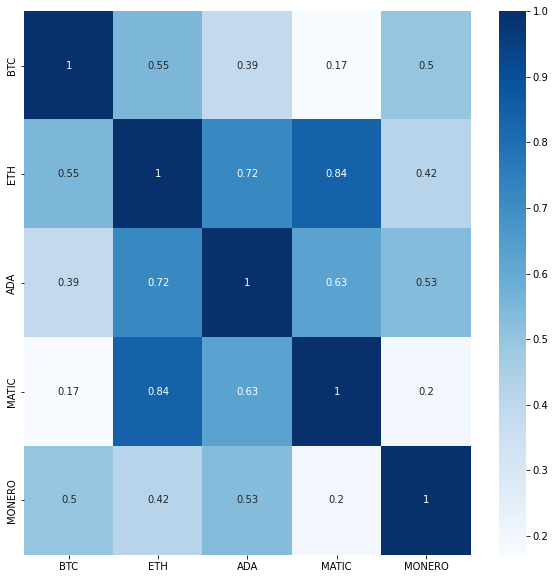

In [137]:
#heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlacao, annot = True, cmap="Blues")

In [138]:
fig = px.line(criptomoedas, y=["BTC",'ETH','ADA','MATIC','MONERO'], title = "BTC vs ETH vs ADA vs MATIC vs MONERO")
fig.show()

In [139]:
fig2 = px.line(criptomoedas, y=['ETH','ADA','MATIC','MONERO'], title = "ETH vs ADA vs MATIC vs MONERO")
fig2.show()

In [140]:
fig3 = px.line(criptomoedas, y=['ADA','MATIC','MONERO'], title="ADA vs MATIC vs MONERO")
fig3.show()

In [141]:
fig4 = px.line(criptomoedas, y=['ADA','MATIC'], title="ADA vs MATIC")
fig4.show()

In [142]:
#maxima de cada criptomoeda no ano em dolar

maxima_btc = criptomoedas["BTC"].max()
maxima_eth = criptomoedas["ETH"].max()
maxima_ada = criptomoedas["ADA"].max()
maxima_matic = criptomoedas["MATIC"].max()
maxima_monero = criptomoedas["MONERO"].max()

print("Máxima de BTC em 2021: US$"," %.2f" % maxima_btc)
print("Máxima de ETH em 2021: US$", "%.2f" % maxima_eth)
print("Máxima de ADA em 2021: US$", "%.2f" % maxima_ada)
print("Máxima de MATIC em 2021: US$", "%.2f" % maxima_matic)
print("Máxima de MONERO em 2021: US$", "%.2f" % maxima_monero)

Máxima de BTC em 2021: US$  67566.83
Máxima de ETH em 2021: US$ 4812.09
Máxima de ADA em 2021: US$ 2.97
Máxima de MATIC em 2021: US$ 2.88
Máxima de MONERO em 2021: US$ 483.58


In [143]:
#minima de cada criptomoeda no ano em dolar

minima_btc = criptomoedas["BTC"].min()
minima_eth = criptomoedas["ETH"].min()
minima_ada = criptomoedas["ADA"].min()
minima_matic = criptomoedas["MATIC"].min()
minima_monero = criptomoedas["MONERO"].min()

print("Mínima de BTC em 2021: US$"," %.2f" % minima_btc)
print("Mínima de ETH em 2021: US$", "%.2f" % minima_eth)
print("Mínima de ADA em 2021: US$", "%.2f" % minima_ada)
print("Mínima de MATIC em 2021: US$", "%.2f" % minima_matic)
print("Mínima de MONERO em 2021: US$", "%.2f" % minima_monero)

Mínima de BTC em 2021: US$  29374.15
Mínima de ETH em 2021: US$ 730.37
Mínima de ADA em 2021: US$ 0.18
Mínima de MATIC em 2021: US$ 0.02
Mínima de MONERO em 2021: US$ 126.02


In [144]:
#valorizacao acumulada de cada criptomoeda no ano

valor_inicial_btc = (criptomoedas.loc[("2021-01-01"), "BTC"])
valor_final_btc = (criptomoedas.loc[("2021-12-31"), "BTC"]) 

valor_inicial_eth = (criptomoedas.loc[("2021-01-01"), "ETH"])
valor_final_eth = (criptomoedas.loc[("2021-12-31"), "ETH"]) 

valor_inicial_ada = (criptomoedas.loc[("2021-01-01"), "ADA"])
valor_final_ada = (criptomoedas.loc[("2021-12-31"), "ADA"]) 

valor_inicial_matic = (criptomoedas.loc[("2021-01-01"), "MATIC"])
valor_final_matic = (criptomoedas.loc[("2021-12-31"), "MATIC"]) 

valor_inicial_monero = (criptomoedas.loc[("2021-01-01"), "MONERO"])
valor_final_monero = (criptomoedas.loc[("2021-12-31"), "MONERO"]) 

valorizacao_btc = ((valor_final_btc * 100)/valor_inicial_btc) - 100
valorizacao_eth = ((valor_final_eth * 100)/valor_inicial_eth) - 100
valorizacao_ada = ((valor_final_ada * 100)/valor_inicial_ada) - 100
valorizacao_matic = ((valor_final_matic * 100)/valor_inicial_matic) - 100
valorizacao_monero = ((valor_final_monero * 100)/valor_inicial_monero) - 100

print("Se você comprasse em 01/01/2021 e mantesse até 31/12/2021, teria a seguinte valorização (em dólar)...")
print("Valorização BTC em 2021: ", "%.2f" % valorizacao_btc, "%")
print("Valorização ETH em 2021: ", "%.2f" % valorizacao_eth, "%")
print("Valorização ADA em 2021: ", "%.2f" % valorizacao_ada, "%")
print("Valorização MATIC em 2021: ", "%.2f" % valorizacao_matic, "%")
print("Valorização MONERO em 2021: ", "%.2f" % valorizacao_monero, "%")


Se você comprasse em 01/01/2021 e mantesse até 31/12/2021, teria a seguinte valorização (em dólar)...
Valorização BTC em 2021:  57.64 %
Valorização ETH em 2021:  404.22 %
Valorização ADA em 2021:  647.20 %
Valorização MATIC em 2021:  14087.67 %
Valorização MONERO em 2021:  68.20 %


In [145]:
brl_usd = web.DataReader("USDBRL=X", "yahoo", inicio, fim)
brl_usd.reset_index(inplace=True)
brl_usd.drop(columns=["High", "Low", "Open", "Close", "Volume"], inplace=True)
brl_usd.set_index("Date", inplace=True)
brl_usd.head()

,Adj Close
Date,
2021-01-01,5.1921
2021-01-04,5.1919
2021-01-05,5.2953
2021-01-06,5.2841
2021-01-07,5.3129


In [146]:
#valorizacao acumulada de cada criptomoeda no ano em reais

valor_inicial_btc_real = (criptomoedas.loc[("2021-01-01"), "BTC"]) * (brl_usd.loc[("2021-01-01"), "Adj Close"])
valor_final_btc_real = (criptomoedas.loc[("2021-12-31"), "BTC"]) * (brl_usd.loc[("2021-12-31"), "Adj Close"])

valor_inicial_eth_real = (criptomoedas.loc[("2021-01-01"), "ETH"]) * (brl_usd.loc[("2021-01-01"), "Adj Close"]) 
valor_final_eth_real = (criptomoedas.loc[("2021-12-31"), "ETH"]) * (brl_usd.loc[("2021-12-31"), "Adj Close"])

valor_inicial_ada_real = (criptomoedas.loc[("2021-01-01"), "ADA"]) * (brl_usd.loc[("2021-01-01"), "Adj Close"])
valor_final_ada_real = (criptomoedas.loc[("2021-12-31"), "ADA"]) * (brl_usd.loc[("2021-12-31"), "Adj Close"])

valor_inicial_matic_real = (criptomoedas.loc[("2021-01-01"), "MATIC"]) * (brl_usd.loc[("2021-01-01"), "Adj Close"])
valor_final_matic_real = (criptomoedas.loc[("2021-12-31"), "MATIC"]) * (brl_usd.loc[("2021-12-31"), "Adj Close"])

valor_inicial_monero_real = (criptomoedas.loc[("2021-01-01"), "MONERO"]) * (brl_usd.loc[("2021-01-01"), "Adj Close"])
valor_final_monero_real = (criptomoedas.loc[("2021-12-31"), "MONERO"]) * (brl_usd.loc[("2021-12-31"), "Adj Close"])

valorizacao_btc_real = ((valor_final_btc_real * 100)/valor_inicial_btc_real) - 100
valorizacao_eth_real = ((valor_final_eth_real * 100)/valor_inicial_eth_real) - 100
valorizacao_ada_real = ((valor_final_ada_real * 100)/valor_inicial_ada_real) - 100
valorizacao_matic_real = ((valor_final_matic_real * 100)/valor_inicial_matic_real) - 100
valorizacao_monero_real = ((valor_final_monero_real * 100)/valor_inicial_monero_real) - 100

print("Se você comprasse em 01/01/2021 e mantesse até 31/12/2021, teria a seguinte valorização (em real)...")
print("Valorização BTC em 2021: ", "%.2f" % valorizacao_btc_real, "%")
print("Valorização ETH em 2021: ", "%.2f" % valorizacao_eth_real, "%")
print("Valorização ADA em 2021: ", "%.2f" % valorizacao_ada_real, "%")
print("Valorização MATIC em 2021: ", "%.2f" % valorizacao_matic_real, "%")
print("Valorização MONERO em 2021: ", "%.2f" % valorizacao_monero_real, "%")


Se você comprasse em 01/01/2021 e mantesse até 31/12/2021, teria a seguinte valorização (em real)...
Valorização BTC em 2021:  69.12 %
Valorização ETH em 2021:  440.93 %
Valorização ADA em 2021:  701.61 %
Valorização MATIC em 2021:  15120.84 %
Valorização MONERO em 2021:  80.45 %


In [129]:
#lucro em reais e em dolares

lucro_btc_real = (valor_final_btc_real) - (valor_inicial_btc_real)
lucro_eth_real = (valor_final_eth_real)- (valor_inicial_eth_real)
lucro_ada_real = (valor_final_ada_real) - (valor_inicial_ada_real)
lucro_matic_real = (valor_final_matic_real) - (valor_inicial_matic_real)
lucro_monero_real = (valor_final_monero_real) - (valor_inicial_monero_real)

lucro_btc_dolar = (valor_final_btc) - (valor_inicial_btc)
lucro_eth_dolar = (valor_final_eth) - (valor_inicial_eth)
lucro_ada_dolar = (valor_final_ada) - (valor_inicial_ada)
lucro_matic_dolar = (valor_final_matic) - (valor_inicial_matic)
lucro_monero_dolar = (valor_final_monero) - (valor_inicial_monero)

print("Se você comprasse em 01/01/2021 e vendesse em 31/12/2021, teria ao seguinte lucro (em dólares e reais)... \n")

print("Lucro BTC em dólar: US$ " "%.2f" % lucro_btc_dolar)
print("Lucro BTC em reais: R$ " "%.2f" % lucro_btc_real, "\n")

print("Lucro ETH em dólar: US$ " "%.2f" % lucro_eth_dolar)
print("Lucro ETH em reais: R$ " "%.2f" % lucro_eth_real, "\n")

print("Lucro ADA em dólar: US$ " "%.2f" % lucro_ada_dolar)
print("Lucro ADA em reais: R$ " "%.2f" % lucro_ada_real, "\n")

print("Lucro MATIC em dólar: US$ " "%.2f" % lucro_matic_dolar)
print("Lucro MATIC em reais: R$ " "%.2f" % lucro_matic_real, "\n")

print("Lucro MONERO em dólar: US$ " "%.2f" % lucro_monero_dolar)
print("Lucro MONERO em reais: R$ " "%.2f" % lucro_monero_real, "\n")

Se você comprasse em 01/01/2021 e vendesse em 31/12/2021, teria ao seguinte lucro (em dólares e reais)... 

Lucro BTC em dólar: US$ 16932.29
Lucro BTC em reais: R$ 105422.62 

Lucro ETH em dólar: US$ 2952.27
Lucro ETH em reais: R$ 16720.86 

Lucro ADA em dólar: US$ 1.13
Lucro ADA em reais: R$ 6.39 

Lucro MATIC em dólar: US$ 2.51
Lucro MATIC em reais: R$ 13.98 

Lucro MONERO em dólar: US$ 92.78
Lucro MONERO em reais: R$ 568.24 

